    Author : Kumud Chauhan
    Email :chauhan.ku@northeastern.edu

# Introduction
In this project we analyzed the COVID-19 Nursing Home Dataset and Star Rating dataset. We present some interseting insights and the correlation between the variables from the two datasets. We want to understand following aspects:
1. How does covid-19 infection relate to the star ratings of the Nursing Homes. 
2. The difference in the covid related facilities and statistics between High rating and low rating nursing homes.

In [2]:
#import required libraries for analysis
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import median
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
# read both datasets and save in data frames
covid_data_df = pd.read_csv("COVID-19_Nursing_Home_Dataset.csv")
ratings_df = pd.read_csv("Star_Ratings.csv")

In [4]:
# dimensions of covid_data
covid_data_df.shape

(153853, 59)

In [5]:
# ratings data dimensions
ratings_df.shape

(15404, 19)

The covid related data has 153k row and 59 columns and ratings data have 15k rows and 19 columns. Since both dataset have different dimensions so we cannot merge them directly.

In [6]:
# display first line of covid data 
covid_data_df.head(2)

,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Submitted Data,Passed Quality Assurance Check,Residents Weekly Admissions COVID-19,Residents Total Admissions COVID-19,Residents Weekly Confirmed COVID-19,Residents Total Confirmed COVID-19,Residents Weekly Suspected COVID-19,Residents Total Suspected COVID-19,Residents Weekly All Deaths,Residents Total All Deaths,Residents Weekly COVID-19 Deaths,Residents Total COVID-19 Deaths,Number of All Beds,Total Number of Occupied Beds,Resident Access to Testing in Facility,Laboratory Type Is State Health Dept,Laboratory Type Is Private Lab,Laboratory Type Is Other,Staff Weekly Confirmed COVID-19,Staff Total Confirmed COVID-19,Staff Weekly Suspected COVID-19,Staff Total Suspected COVID-19,Staff Weekly COVID-19 Deaths,Staff Total COVID-19 Deaths,Shortage of Nursing Staff,Shortage of Clinical Staff,Shortage of Aides,Shortage of Other Staff,Any Current Supply of N95 Masks,One-Week Supply of N95 Masks,Any Current Supply of Surgical Masks,One-Week Supply of Surgical Masks,Any Current Supply of Eye Protection,One-Week Supply of Eye Protection,Any Current Supply of Gowns,One-Week Supply of Gowns,Any Current Supply of Gloves,One-Week Supply of Gloves,Any Current Supply of Hand Sanitizer,One-Week Supply of Hand Sanitizer,Ventilator Dependent Unit,Number of Ventilators in Facility,Number of Ventilators in Use for COVID-19,Any Current Supply of Ventilator Supplies,One-Week Supply of Ventilator Supplies,"Total Resident Confirmed COVID-19 Cases Per 1,000 Residents","Total Resident COVID-19 Deaths Per 1,000 Residents",Total Residents COVID-19 Deaths as a Percentage of Confirmed COVID-19 Cases,County,Three or More Confirmed and Suspected COVID-19 Cases This Week,Initial Confirmed COVID-19 Case This Week,Geolocation
0,07/19/2020,335797,THE OSBORN,101 THEALL ROAD,RYE,NY,10580,Y,Y,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,84.0,67.0,Y,N,Y,N,2.0,19.0,0.0,4.0,0.0,0.0,N,N,N,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,N,NaN,NaN,NaN,NaN,14.9,14.9,100.0,Westchester,N,N,POINT (-73.70068000000002 40.971997)
1,06/14/2020,335427,ONEIDA HEALTH REHABILITATION AND EXTENDED CARE,323 GENESEE STREET,ONEIDA,NY,13421,Y,Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,140.0,Y,N,Y,N,0.0,0.0,0.0,0.0,0.0,0.0,N,N,N,N,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,Y,0.0,0.0,Y,Y,0.0,0.0,NaN,Madison,N,N,POINT (-75.654453 43.078776)


In [7]:
# display first line of ratings data 
ratings_df.head(2)

,Federal Provider Number,Provider Name,Provider State,Overall Rating,Overall Rating Footnote,Health Inspection Rating,Health Inspection Rating Footnote,QM Rating,QM Rating Footnote,Long-Stay QM Rating,Long-Stay QM Rating Footnote,Short-Stay QM Rating,Short-Stay QM Rating Footnote,Staffing Rating,Staffing Rating Footnote,RN Staffing Rating,RN Staffing Rating Footnote,Processing Date,Location
0,015009,"BURNS NURSING HOME, INC.",AL,5.0,NaN,5.0,NaN,5.0,NaN,5.0,NaN,5.0,NaN,4.0,NaN,4.0,NaN,07/01/2020,"701 MONROE STREET NW RUSSELLVILLE, AL 35653 (34.514971, -87.736372)"
1,015010,COOSA VALLEY HEALTHCARE CENTER,AL,4.0,NaN,3.0,NaN,4.0,NaN,2.0,NaN,5.0,NaN,5.0,NaN,5.0,NaN,07/01/2020,"260 WEST WALNUT STREET SYLACAUGA, AL 35150 (33.163735, -86.254687)"


    In the data description provided on the websites, it is mentioned that the COVID dataset contains weekly data. except one, the data in the week ending on 24th May is from 1st January 2020 through 24th May 2020.
    Since in this analysis, we are not working with the weekly statistics of data but we want to analyze the patterns based on providers. So we transform the data according to our analysis and will work on COVID related columns.
    
    We make the following transformation steps for our further analysis:
    1. Choose only 4 major rating columns from the rating dataset.
    2. Choose COVID related numbers from the nursing home dataset.
    3. Choose only common providers present in both datasets by using a set intersection operator.
    4. Group the weekly data of common providers and sum the numbers to get the cumulative data as on last week.
    5. Rename the required columns.

In [5]:
# list all required colulmns from both data for our further analysis
rating_columns = ['Overall Rating', 'Health Inspection Rating', 'QM Rating', 'Staffing Rating']
covid_data_columns = ['Residents Total Admissions COVID-19','Residents Total Confirmed COVID-19','Residents Total Suspected COVID-19',
'Residents Total COVID-19 Deaths','Staff Total Confirmed COVID-19','Staff Total COVID-19 Deaths','Number of Ventilators in Use for COVID-19',
'Total Resident COVID-19 Deaths Per 1,000 Residents','Total Residents COVID-19 Deaths as a Percentage of Confirmed COVID-19 Cases']

# find common providers 
common_providers = set(covid_data_df['Federal Provider Number']).intersection(ratings_df['Federal Provider Number'])

common_providers_covid_data_df = covid_data_df[covid_data_df['Federal Provider Number'].isin(common_providers)][covid_data_columns+['Federal Provider Number']]

cummulative_covid_data_df = common_providers_covid_data_df.groupby('Federal Provider Number').sum().reset_index()
common_providers_ratings_df = ratings_df[ratings_df['Federal Provider Number'].isin(common_providers)][rating_columns+['Federal Provider Number']] 

common_providers_df = pd.merge(cummulative_covid_data_df, common_providers_ratings_df, on='Federal Provider Number')

# update column name
common_providers_df = common_providers_df.rename(columns = {'Total Residents COVID-19 Deaths as a Percentage of Confirmed COVID-19 Cases':'Total Residents COVID-19 Deaths Percentage'})
covid_data_columns[8] = 'Total Residents COVID-19 Deaths Percentage'

In [6]:
# combined data top 5 rows
common_providers_df.head(5)

,Federal Provider Number,Residents Total Admissions COVID-19,Residents Total Confirmed COVID-19,Residents Total Suspected COVID-19,Residents Total COVID-19 Deaths,Staff Total Confirmed COVID-19,Staff Total COVID-19 Deaths,Number of Ventilators in Use for COVID-19,"Total Resident COVID-19 Deaths Per 1,000 Residents",Total Residents COVID-19 Deaths Percentage,Overall Rating,Health Inspection Rating,QM Rating,Staffing Rating
0,015009,83.0,450.0,10.0,44.0,349.0,0.0,0.0,965.6,97.8,5.0,5.0,5.0,4.0
1,015010,0.0,0.0,229.0,0.0,25.0,0.0,0.0,0.0,0.0,4.0,3.0,4.0,5.0
2,015012,7.0,17.0,278.0,0.0,25.0,0.0,0.0,0.0,0.0,3.0,2.0,2.0,5.0
3,015014,10.0,43.0,4.0,0.0,71.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,3.0
4,015015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,3.0,3.0


In [7]:
# descriptive statistics 
common_providers_df.describe()

,Residents Total Admissions COVID-19,Residents Total Confirmed COVID-19,Residents Total Suspected COVID-19,Residents Total COVID-19 Deaths,Staff Total Confirmed COVID-19,Staff Total COVID-19 Deaths,Number of Ventilators in Use for COVID-19,"Total Resident COVID-19 Deaths Per 1,000 Residents",Total Residents COVID-19 Deaths Percentage,Overall Rating,Health Inspection Rating,QM Rating,Staffing Rating
count,15385.000000,15385.000000,15385.000000,15385.000000,15385.000000,15385.000000,15385.000000,15385.000000,15385.000000,15186.000000,15186.000000,15164.000000,14205.000000
mean,31.691128,80.870913,49.052974,22.433604,54.151251,0.365876,0.944946,279.017992,141.491355,3.217832,2.807323,3.758177,3.046533
std,94.963116,192.788346,140.064663,63.602946,111.729382,3.148759,14.855952,767.802943,880.988566,1.413408,1.278742,1.216254,1.147470
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,4.000000,3.000000
75%,17.000000,46.000000,33.000000,9.000000,52.000000,0.000000,0.000000,95.400000,42.600000,5.000000,4.000000,5.000000,4.000000
max,2439.000000,2808.000000,2810.000000,937.000000,2808.000000,99.000000,967.000000,12762.100000,76400.000000,5.000000,5.000000,5.000000,5.000000


## Correlation Analsyis

We calculate the correlation between the columns containing the number of suspected cases, confirmed cases, deaths due to COVID with the star rating. Since the star ratings are ordinal we use the Spearman correlation method.

In [8]:
# calculate the correlation between covid-19 related columns with different star ratings  columns
corr_mat = common_providers_df.corr('spearman')[rating_columns].loc[covid_data_columns]

Text(0.5, 1, 'Correlation matrix')

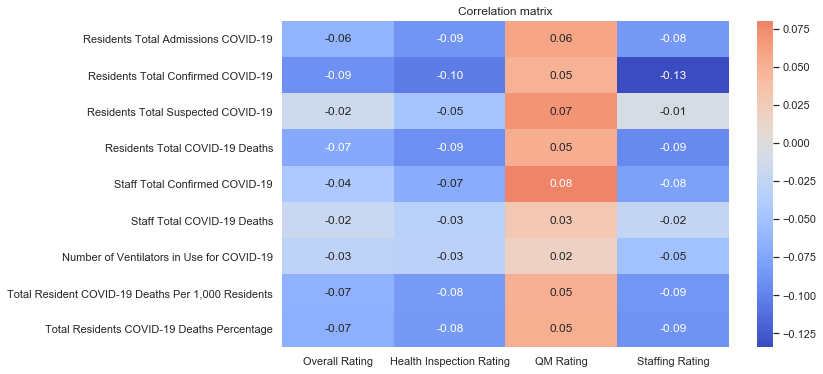

In [15]:
# display the calculated correlation matrix in the form of heat map 
sns.set(font_scale=1.4)
sns.set(rc={'figure.figsize':(10,6)})
ax = sns.heatmap(corr_mat,cmap= 'coolwarm', annot = True,fmt=".2f",
                center=0.0)
ax.set_title("Correlation matrix")

The heatmap shows positive correaltion with red shades and negative high correaltion with blue shades. Darker shades reflects high correaltion.

The above heatmap reflects that the 'QM Rating' has the most positive correlation with all the covid related numbers.
While the 'Staffing Rating' has the negative correlation with the Residents Total Confirmed COVID-19'.
we analyze several important columns with the ratings to further understand the relations.

## Data Visualization

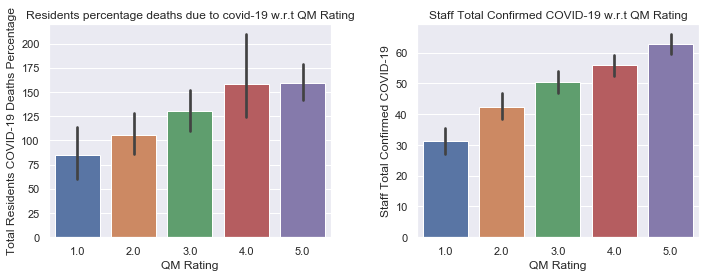

In [26]:
# visulaizing most positively correlated columns with QM Rating to reflect 
fig, axes = plt.subplots(nrows = 1, ncols = 2)
sns.set(rc={'figure.figsize':(8,4)})
plt.subplot(1,2,1)
ax1 = sns.barplot(x='QM Rating', 
                 y='Total Residents COVID-19 Deaths Percentage', 
                data=common_providers_df)
ax1.set_title("Residents percentage deaths due to covid-19 w.r.t QM Rating")
plt.subplot(1,2,2)
ax2 = sns.barplot(x='QM Rating', 
                 y='Staff Total Confirmed COVID-19', 
                data=common_providers_df)
ax2.set_title("Staff Total Confirmed COVID-19 w.r.t QM Rating")
plt.tight_layout()

In the above plots, we observed that even the nursing homes which have a high `Quality Measure Rating` has more residents deaths and `staff confirmed cases` compared to the low QM star rating which is surprising.

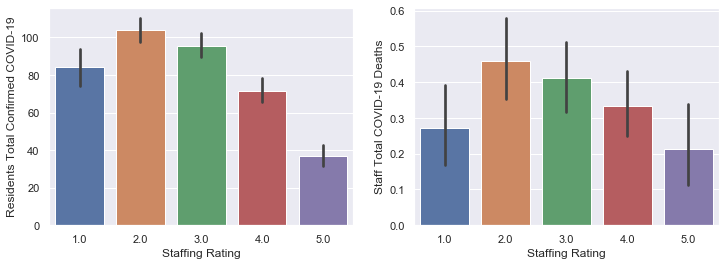

In [28]:
# visulaizing most negatitively correlated columns of the correation matrix 
fig, axes = plt.subplots(nrows = 1, ncols = 2)
plt.subplot(1,2,1)
sns.set(rc={'figure.figsize':(8,4)})
ax1 = sns.barplot(x='Staffing Rating', 
                 y='Residents Total Confirmed COVID-19', 
                data=common_providers_df)
plt.subplot(1,2,2)
ax2 = sns.barplot(x='Staffing Rating', 
                 y='Staff Total COVID-19 Deaths', 
                data=common_providers_df)

The above visualizations reflect that the Staffing Rating is negatively correlated which means the high star rating nursing homes have reported fewer Residents Total Confirmed COVID-19 as well as fewer staff deaths due to COVID-19.
The staffing rating is a very important star rating to reflect the ability to fight with COVID-19 as compared to the QM rating.

Text(0.5, 1.0, 'Residents Total Admissions by Overall Rating')

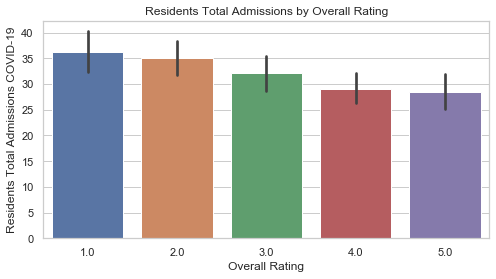

In [29]:
# visualizing the residents behavious with respect to the overall Rating
sns.set(rc={'figure.figsize':(8,4)})
sns.set(style="whitegrid")
ax = sns.barplot(x='Overall Rating', 
                 y='Residents Total Admissions COVID-19',
                data=common_providers_df)
ax.set_title("Residents Total Admissions by Overall Rating")

In the above plot, we observe that most residents admitted to the low overall star rating facilities than the high star rating facilities.

The number of COVID-19 patient admissions is less in the high overall rated nursing homes than low rated which explains the patients are not that biased to visit only high star rated facilities. 

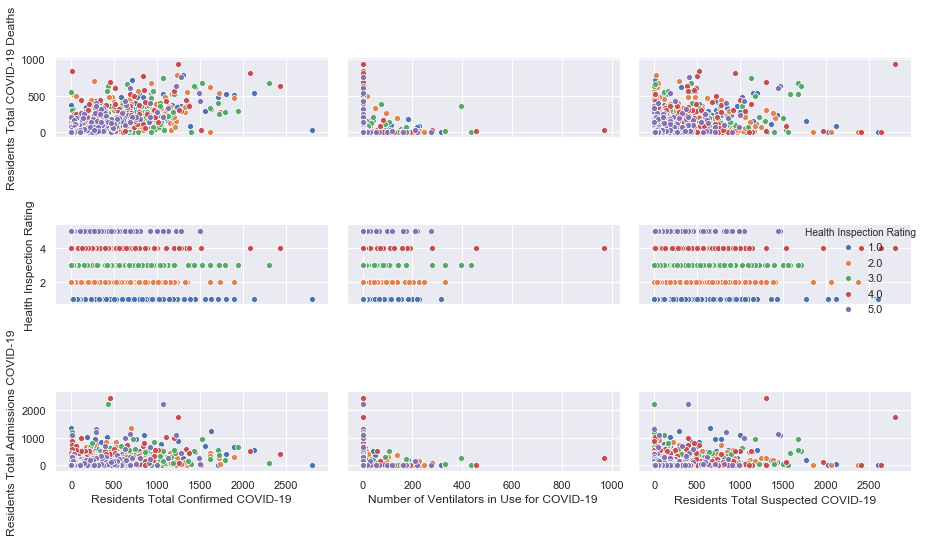

In [58]:
subset_df = common_providers_df[covid_data_columns +['Health Inspection Rating']]
sns.set(rc={'figure.figsize':(10,7)})
ax = sns.pairplot(subset_df, x_vars=['Residents Total Confirmed COVID-19',
                                    'Number of Ventilators in Use for COVID-19',
                                   'Residents Total Suspected COVID-19'],
                y_vars=['Residents Total COVID-19 Deaths',
                        'Health Inspection Rating', 
                        'Residents Total Admissions COVID-19'],
                aspect = 1.5,hue="Health Inspection Rating")

In the above plot, we present insights showing the relationships between the admission, suspected cases, deaths, and health inspection rating with the number of ventilators.
A few interesting observations are as follows:
1. As shown in the first scatter plot, there is a linear relationship between Total confirmed COVID cases and deaths.
2. The 5-star health inspection rating nursing homes have less suspected, confirmed cases as well as deaths.
3. The 4-star health inspection rating facilities used most ventilators for COVID-19 patients.

# Conclusion
We analyze various relationships between COVID infections and star rating system. To our surprise, QM Rating is not a good indicator of COVID care performance of a health facility while Staffing Rating and Health Inspection Ratings are more reliable indicators. Further, we find that Overall Rating is also not a very informative indicator for COVID care.

